In [1]:
import pandas as pd
import numpy as np
from pylab import mpl, plt
%matplotlib inline

In [2]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

In [33]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print(gender, value.mean())

Female 109.45
Male 115.25


In [36]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 288x216 with 0 Axes>

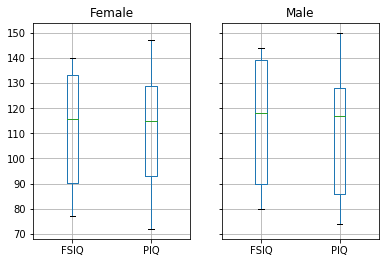

In [30]:
plt.figure(figsize=(4, 3))
groupby_gender.boxplot(column=['FSIQ', 'PIQ'])

Plotting data

In [38]:
from pandas.tools import plotting
plotting.scatter_matrix(data['Weight', 'Height', 'MRI_Count'])
plotting.scatter_matrix(data['PIQ', 'VIQ', 'FSIQ'])

ModuleNotFoundError: No module named 'pandas.tools'

# 2. Hypothesis testing

In [39]:
from scipy import stats

## 2.1 t-test

In [40]:
# 1-sample t-test: tests if the population mean of data is likely to be equal to a given value
stats.ttest_1samp(data['VIQ'], 0)
#plt.figure(figsize=(4, 3))
#groupby_gender.boxplot(column=['FSIQ', 'PIQ'])

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [41]:
# 2-sample t-test: testing for difference across populations
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

## 2.2 Paired tests

In [21]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [22]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [24]:
stats.ttest_1samp(data['FSIQ'] -  data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [44]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

# 5.3 Linear models

## 5.3.1 “formulas” to specify statistical models

In [46]:
# simple linear regression
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3 * x + 4 * np.random.normal(size=x.shape)
data = pd.DataFrame({'x': x, 'y': y})

In [47]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Fri, 31 May 2019   Prob (F-statistic):           8.56e-08
Time:                        23:09:33   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [50]:
# Categorical variables
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

In [53]:
model = ols("VIQ ~ Gender + 1", data).fit()

In [54]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Fri, 31 May 2019   Prob (F-statistic):              0.445
Time:                        23:12:41   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.